# Dogs and Cats

In [1]:
import conx as cx
import os
import glob
from tqdm import tqdm

Using TensorFlow backend.
ConX, version 3.7.5


First, you'll need to have an account at Kaggle.com. Got over there and log in.

Next, let's get the data. Go to https://www.kaggle.com/c/dogs-vs-cats/data and download the test1.zip and train.zip files into this folder.

In [2]:
cx.download("https://www.kaggle.com/c/3362/download/test1.zip", verbose=0)

Using cached https://www.kaggle.com/c/3362/download/test1.zip as './test1.zip'.
Unzipping files...
Done!
Available: 12501 of 12501.


In [3]:
cx.download("https://www.kaggle.com/c/3362/download/train.zip", verbose=0)

Using cached https://www.kaggle.com/c/3362/download/train.zip as './train.zip'.
Unzipping files...
Done!
Available: 25001 of 25001.


In [4]:
%%time
if not os.path.exists("test_data.h5"):
    def read_data(directory):
        for filename in tqdm(glob.glob(directory)):
            target = [0,0] # we don't know what these are
            yield cx.image_to_array(filename, (64,64), raw=True)
    cx.save_data("test_data.h5", read_data("./test1/*.jpg"))
test_data = cx.load_data("test_data.h5", return_h5=True)

CPU times: user 291 ms, sys: 220 ms, total: 511 ms
Wall time: 510 ms


In [5]:
%%time
if True or not os.path.exists("train_data.h5"):
    targets = []
    def read_data(directory):
        for filename in tqdm(glob.glob(directory)):
            yield [0,1] if "dog" in filename else [1, 0] # cat
            #yield cx.image_to_array(filename, (64,64), raw=True)
    #cx.save_data("train_data.h5", read_data("./train/*.jpg"))
    targets = [x for x in read_data("./train/*.jpg")]
train_data = cx.load_data("train_data.h5", return_h5=True)

100%|██████████| 25000/25000 [00:00<00:00, 389740.01it/s]


CPU times: user 793 ms, sys: 338 ms, total: 1.13 s
Wall time: 1.12 s


In [6]:
cx.shape(train_data["data"]), cx.shape(test_data["data"]), cx.shape(targets)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [7]:
net = cx.Network("Dogs and Cats")
net.add(
    cx.ImageLayer("input", (64,64), 3),
    cx.Convolution2DLayer("conv", 16, (4,4)),
    cx.FlattenLayer("flatten"),
    cx.Layer("hidden", 32, activation="relu"),
    cx.Layer("output", 2, activation="softmax")
)
net.connect()
net.compile(error="binary_crossentropy", optimizer="rmsprop")

In [8]:
net.dataset._targets = [cx.np.array(targets)]
net.dataset._inputs = [train_data]
net.dataset._labels = [None] * 25000
net.dataset._cache_values()

In [9]:
cx.shape(net.dataset.inputs[0])

(64, 64, 3)

In [10]:
net.dataset.targets[0]

[1, 0]

In [11]:
net.dataset.set_labels_from_function(lambda i: "Cat" if net.dataset.targets[i] == [1, 0] else "Dog")

In [12]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, …

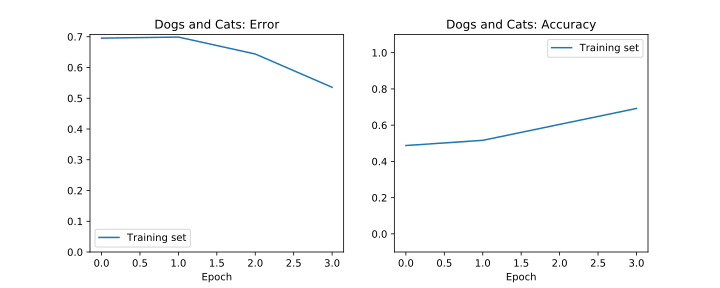

In [ ]:
net.train(100, accuracy=.98)

In [11]:
net.evaluate(select=100)

Dogs and Cats:
Selected Data Results: range(100)
               loss:       0.69
                acc:       0.49


In [ ]:
data = net.evaluate_and_label()

In [14]:
[x[0] for x in data]

['Cat (wrong)', 'Dog (wrong)']

In [12]:
import pandas as pd

In [23]:
df = pd.DataFrame(data=[net.dataset._labels])

In [25]:
net.dataset.set_inputs_from_targets?

In [2]:
mnist_hp = cx.Dataset.get("mnist_h5")

In [3]:
mnist_hp.save_to_disk("MNIST.conx")

In [2]:
ds = cx.Dataset()

ds.load_from_disk("MNIST.conx")

True

In [4]:
ds._inputs[0].dtype

dtype('<f2')

In [5]:
net

NameError: name 'net' is not defined